# Lecture 8

## Exercise 8.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

## Implementation

To compute the expectation value of energy, we need to evaluate the integral

$$
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{\hat{H} \Psi_T(x)}{\Psi_T(x)}
$$

However, using Monte Carlo simulation, we can efficiently approximate this with

$$
\int dx \rho(x) \frac{\hat{H} \Psi_T(x)}{\Psi_T(x)} \approx \sum \frac{\hat{H} \Psi_T(x)}{\Psi_T(x)}
$$ 

where ρ(x) is sampled using the Metropolis algorithm.

To verify the correctness of the sampling method i have chosen the parameters of my trial function such that \$$\mu = 0$$ and $$\sigma = 1$$
 to sample a simple gaussian distribution



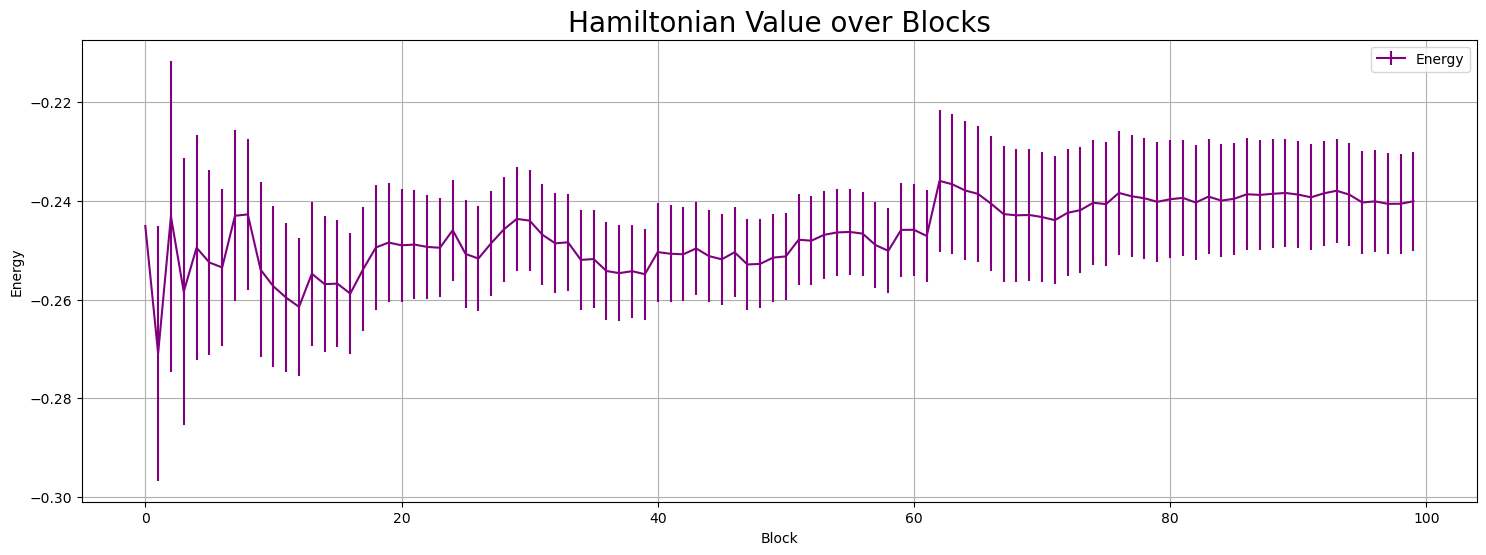

In [148]:
import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt('OUTPUT/8.1/History.txt', skiprows=1)

# Separate the columns into different variables
energy = data[:, 0]
error = data[:, 1]
acceptance = data[:, 2]

# Plot the energy with error bars
plt.figure(figsize=(18, 6))
plt.errorbar(range(len(energy)), energy, yerr=error, fmt='-', label='Energy', color='purple')
plt.xlabel('Block')
plt.ylabel('Energy')
plt.title('Hamiltonian Value over Blocks', fontsize=20)
plt.grid()
plt.legend()
plt.show()

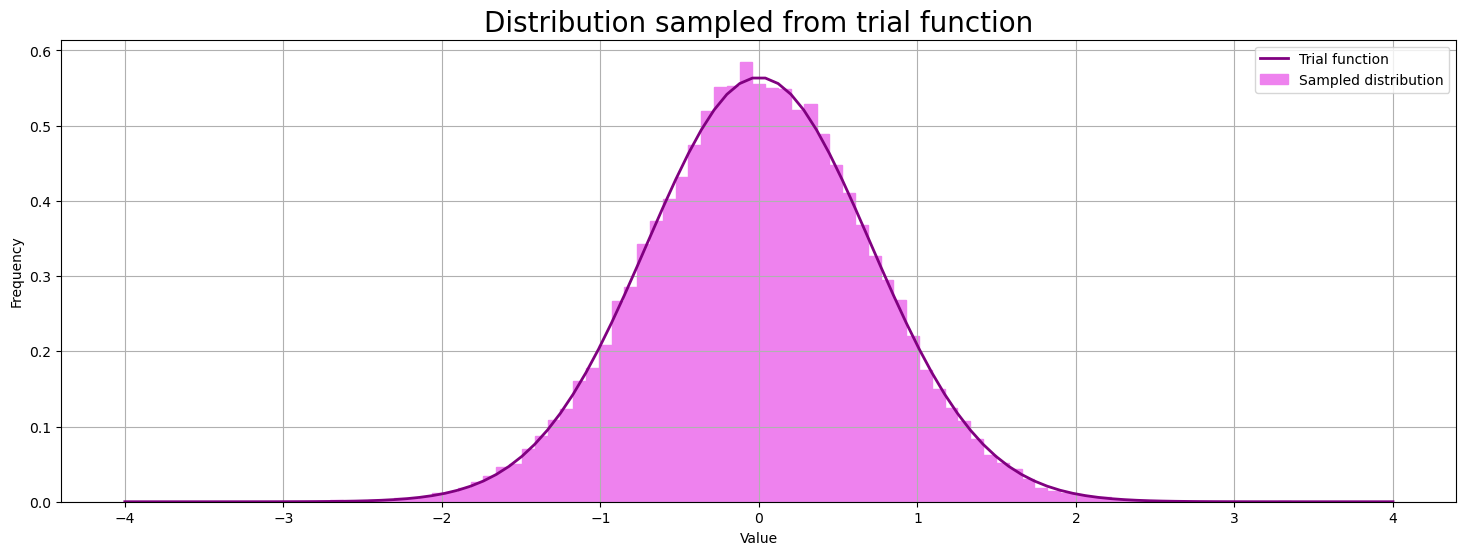

In [130]:
def trial_function(x, mu, sigma):
    return pow(np.exp(-pow(x - mu, 2) / (2 * sigma * sigma)) + np.exp(-pow(x + mu, 2) / (2 * sigma * sigma)), 2)


x = np.linspace(-4, 4, 100)
y = trial_function(x, 0, 1) / (4 * np.sqrt(np.pi))

plt.figure(figsize=(18, 6))
data = np.loadtxt("OUTPUT/8.1/Points.txt")
plt.plot(x, y, "-", color='purple', label="Trial function", linewidth=2)
plt.hist(data, bins=x, density=True, color='violet', edgecolor='violet', label="Sampled distribution")
plt.title('Distribution sampled from trial function', fontsize=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

## Exercise 8.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the Simulated Anneling SM steps of the algorithm</span>
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

## Implementation

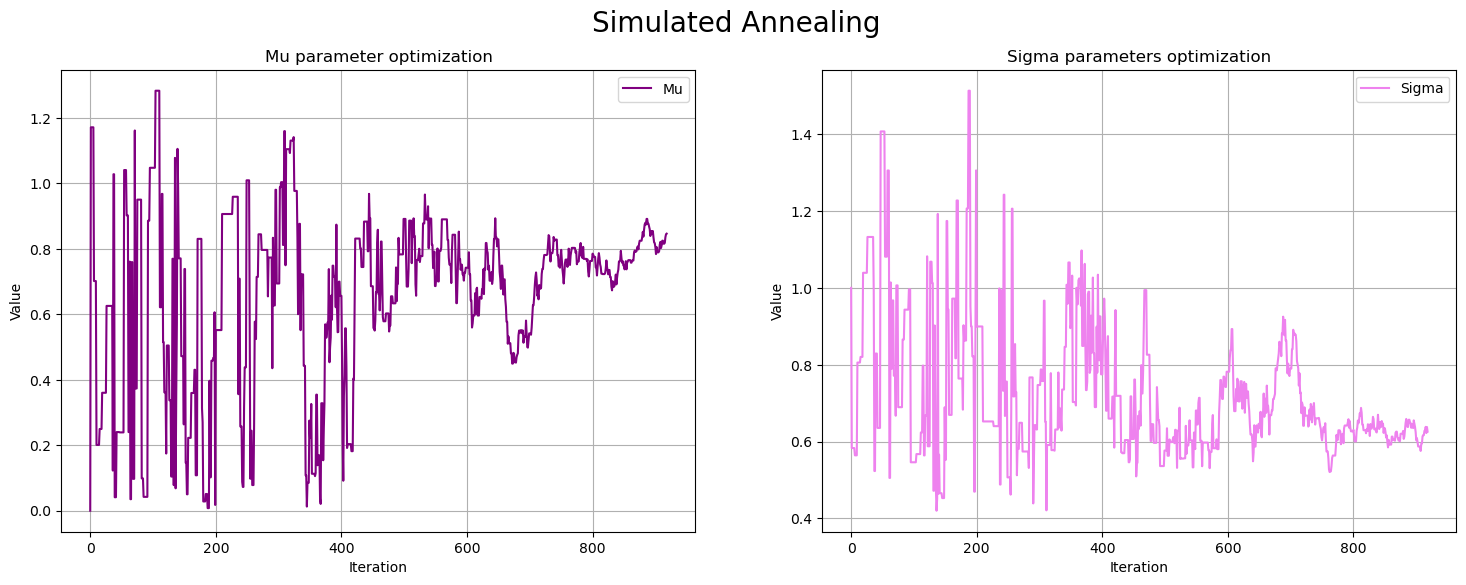

In [138]:
data = np.loadtxt('OUTPUT/8.2/training_parameters.txt', skiprows=1)

# Separate the columns into different variables
v_mu = data[:, 0]
v_sigma = data[:, 1]

# Plot training history of mu parameter
plt.figure(figsize=(18, 6))
plt.suptitle("Simulated Annealing", fontsize=20)
plt.subplot(1, 2, 1)
plt.plot(range(len(v_mu)), v_mu, '-', label='Mu', color='purple')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Mu parameter optimization')
plt.grid()
plt.legend()

# Plot training history of sigma parameter
plt.subplot(1, 2, 2)
plt.plot(range(len(v_sigma)), v_sigma, '-', label='Sigma', color='violet')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Sigma parameters optimization')
plt.grid()
plt.legend()

plt.show()

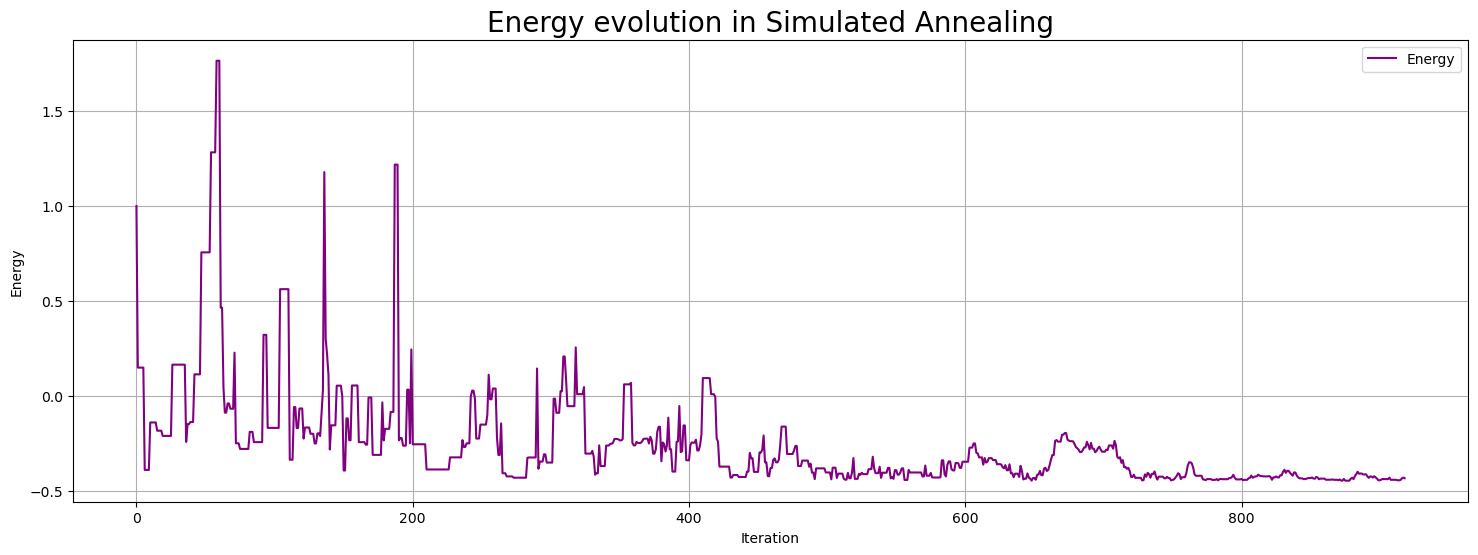

In [143]:
data = np.loadtxt("OUTPUT/8.2/training.txt", skiprows=1)
energy = data[:,0]

# Plot the energy with error bars
plt.figure(figsize=(18, 6))
plt.plot(range(len(energy)), energy, '-', label='Energy', color='purple')
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Energy evolution in Simulated Annealing', fontsize=20)
plt.grid()
plt.legend()
plt.show()

The energy measurements have been performed after 10.000 steps of equilibration

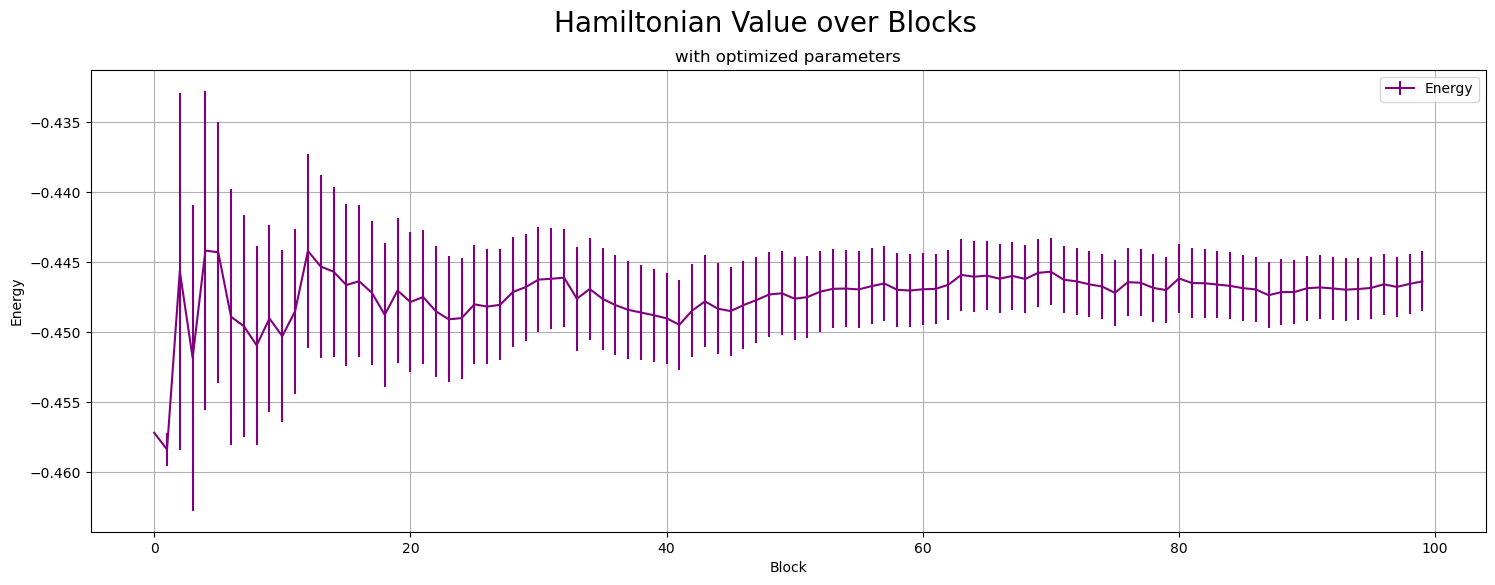

In [147]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('OUTPUT/8.2/History.txt', skiprows=1)

# Separate the columns into different variables
energy = data[:, 0]
error = data[:, 1]
acceptance = data[:, 2]

# Plot the energy with error bars
plt.figure(figsize=(18, 6))
plt.suptitle("Hamiltonian Value over Blocks", fontsize=20)
plt.errorbar(range(len(energy)), energy, yerr=error, fmt='-', label='Energy', color='purple')
plt.xlabel('Block')
plt.ylabel('Energy')
plt.title('with optimized parameters')
plt.grid()
plt.legend()
plt.show()

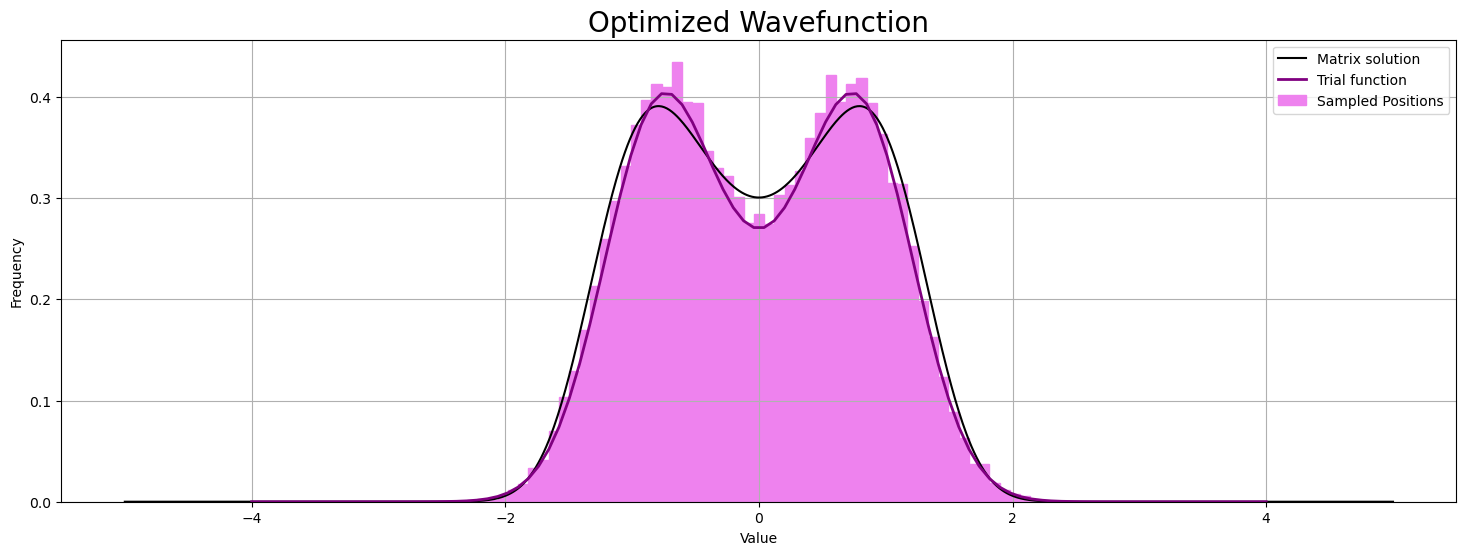

In [149]:
# Plot the numerical solutions
def Vpot(x):
    return (x**2 - 2.5)*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0]
V = Vpot(x)
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

plt.figure(figsize=(18, 6))
scale = 0.3
plt.plot(x,(psi[0])**2, color='black', label="Matrix solution")


# Plot the optimized solution and the samples distribution
best_param = np.loadtxt('OUTPUT/8.2/best_param.txt')

def trial_function(x, mu, sigma):
    return pow(np.exp(-pow(x - mu, 2) / (2 * sigma * sigma)) + np.exp(-pow(x + mu, 2) / (2 * sigma * sigma)), 2)


x = np.linspace(-4, 4, 100)
y = trial_function(x, best_param[0], best_param[1]) / (3/2.0 * np.sqrt(np.pi))

#plt.figure(figsize=(18, 6))
data = np.loadtxt("OUTPUT/8.2/Points.txt")
plt.plot(x, y, "-", color='purple', label="Trial function", linewidth=2)
plt.hist(data, bins=x, density=True, color='violet', edgecolor='violet', label="Sampled Positions")
plt.title('Optimized Wavefunction', fontsize=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()